# ECE 175A
## By: Jay Paek

In [1]:
from scipy.io import loadmat as load
import scipy.io as sio
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
# import cupy as np

In [2]:
data = load('data.mat')
labels = load('label.mat')
train_data = data['imageTrain'].astype('int').reshape((784,5000)).T
train_labels = labels['labelTrain'].reshape((5000,))
test_data = data['imageTest'].astype('int').reshape((784,500)).T
test_labels = labels['labelTest'].reshape((500,))

In [3]:
# Initialize the cluster means randomly
np.random.seed(0)
cluster_means = np.random.rand(10,784)
length = 5000

# Initialize the cluster assignments and old cluster assignments
cluster_assignments = np.zeros(train_data.shape[0])
old_assignments = np.zeros(train_data.shape[0])

# Define the stopping criterion
epsilon = 0.002 * train_data.shape[0]

In [4]:
while True:
    # Update the old cluster assignments
    old_assignments = np.copy(cluster_assignments)
    
    # Assign each point to its nearest cluster
    for i in range(length):
        cluster_assignments[i] = np.argmin(np.linalg.norm(train_data[i]-cluster_means, axis=1))
        
    # Update the cluster means
    for j in range(10):
        cluster_means[j,:] = np.mean(train_data[cluster_assignments == j], axis=0)
    print(np.sum(cluster_assignments != old_assignments))
    if np.sum(cluster_assignments != old_assignments) < epsilon:
        break

4751
2570
1201
628
479
427
339
219
139
88
61
41
32
22
12
9


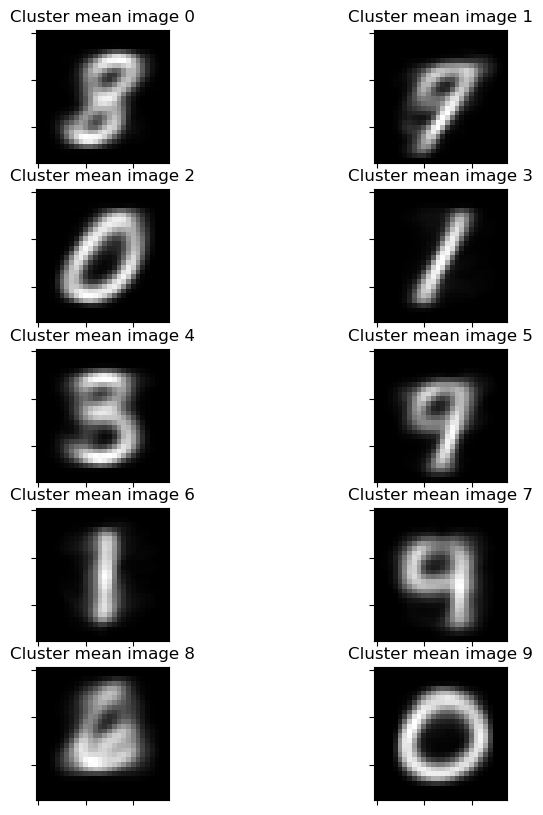

In [5]:
# Display the cluster means as images
ax, arr = plt.subplots(5,2, figsize=(8, 10))
for i in range(10):
    arr[int(i/2)][i%2].imshow(cluster_means[i, :].reshape((28,28)), cmap='gray')
    arr[int(i/2)][i%2].set_yticklabels([])
    arr[int(i/2)][i%2].set_xticklabels([])
    arr[int(i/2)][i%2].set_title(f'Cluster mean image {i}')

## Problem 2

In [6]:
# Initialize the cluster means randomly
cluster_means = train_data[[1559,1455,2304,751,3506,1944,2834,2772,4637,4728], :]
print(cluster_means.shape)
length = 5000

# Initialize the cluster assignments and old cluster assignments
cluster_assignments = np.zeros(train_data.shape[0])
old_assignments = np.zeros(train_data.shape[0])

# Define the stopping criterion
epsilon = 5

(10, 784)


In [7]:
while True:
    # Update the old cluster assignments
    old_assignments = np.copy(cluster_assignments)
    
    # Assign each point to its nearest cluster
    for i in range(length):
        cluster_assignments[i] = np.argmin(np.linalg.norm(train_data[i]-cluster_means, axis=1))
        
    # Update the cluster means
    for j in range(10):
        cluster_means[j,:] = np.mean(train_data[cluster_assignments == j], axis=0)
    print(np.sum(cluster_assignments != old_assignments))
    if np.sum(cluster_assignments != old_assignments) < epsilon:
        break

4685
1491
758
514
364
249
186
142
135
132
128
116
101
56
45
47
42
29
23
21
29
27
26
25
26
28
27
26
25
22
18
12
14
12
12
9
4


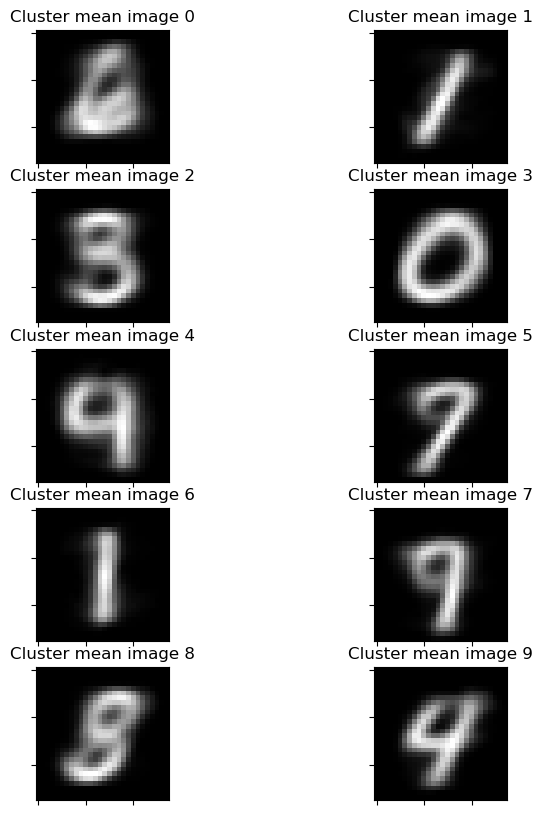

In [8]:
# Display the cluster means as images
ax, arr = plt.subplots(5,2, figsize=(8, 10))
for i in range(10):
    arr[int(i/2)][i%2].imshow(cluster_means[i, :].reshape((28,28)), cmap='gray')
    arr[int(i/2)][i%2].set_yticklabels([])
    arr[int(i/2)][i%2].set_xticklabels([])
    arr[int(i/2)][i%2].set_title(f'Cluster mean image {i}')

## Problem 3

In [9]:
cluster_labels = [6,3,0,7,1,9,8,4]
represented = set(cluster_labels)
cluster_means = np.delete(cluster_means, [1,4], axis=0)
print("Values that are not represented: 2 and 5")

Values that are not represented: 2 and 5


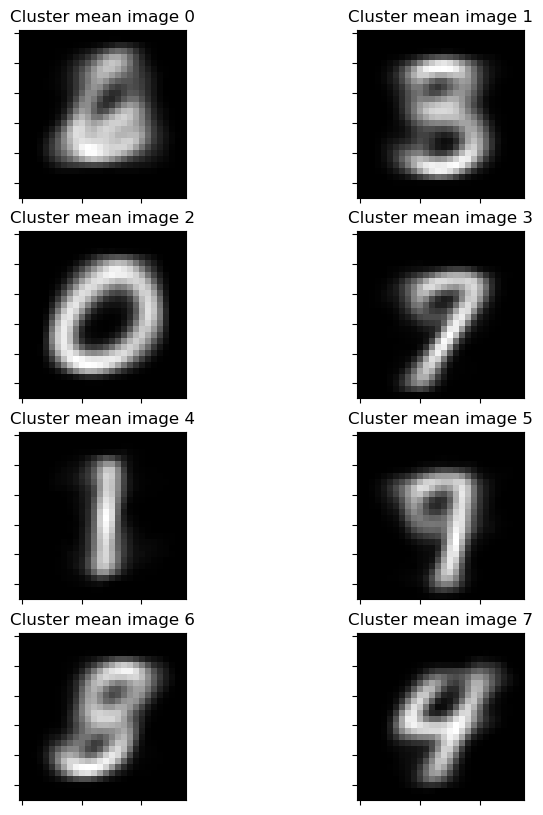

In [10]:
# Display the cluster means as images
ax, arr = plt.subplots(4,2, figsize=(8, 10))
for i in range(8):
    arr[int(i/2)][i%2].imshow(cluster_means[i, :].reshape((28,28)), cmap='gray')
    arr[int(i/2)][i%2].set_yticklabels([])
    arr[int(i/2)][i%2].set_xticklabels([])
    arr[int(i/2)][i%2].set_title(f'Cluster mean image {i}')

In [11]:
predictions = []
closest = []
for image in test_data:
    close = np.argmin(np.linalg.norm(image-cluster_means, axis=1))
    predictions.append(cluster_labels[close])

In [12]:
expected = []
predicted = [0] * 10
for i in range(10):
    expected.append(np.count_nonzero(test_labels == i))
for i in range(len(test_labels)):
    answer = test_labels[i]
    if answer == predictions[i] and answer in cluster_labels:
        predicted[answer] += 1

Text(0.5, 0, 'Class')

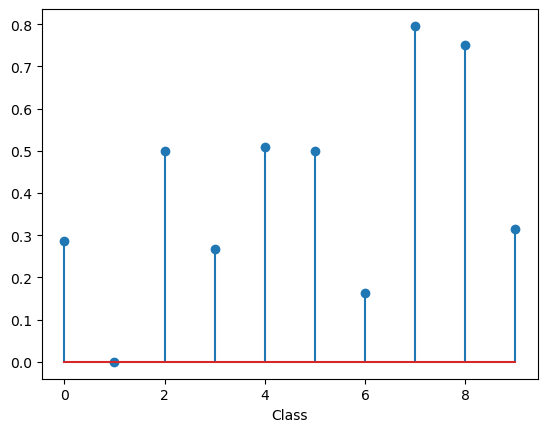

In [13]:
error_rates = [1-predicted[i]/expected[i] for i in range(10)]
for i in range(10):
    if i not in cluster_labels:
        error_rates[i] = 0.5
plt.stem(error_rates)
plt.xlabel('Class')

In [14]:
print(f'Total Error Rate: {1-sum(predicted)/sum(expected)}')

Total Error Rate: 0.5


In [15]:
sum(expected)

500

## Problem 4

In [16]:
# Initialize the cluster means randomly
selection2 = [3206,934,4362,2693,1180,1308,1636,1575,4421,652]
cluster_means = train_data[[3206,934,4362,2693,1180,1308,1636,1575,4421,652], :]
print(cluster_means.shape)
length = 5000

# Initialize the cluster assignments and old cluster assignments
cluster_assignments = np.zeros(train_data.shape[0])
old_assignments = np.zeros(train_data.shape[0])

# Define the stopping criterion
epsilon = 0.002 * train_data.shape[0]

(10, 784)


In [17]:
while True:
    # Update the old cluster assignments
    old_assignments = np.copy(cluster_assignments)
    
    # Assign each point to its nearest cluster
    for i in range(length):
        cluster_assignments[i] = np.argmin(np.linalg.norm(train_data[i]-cluster_means, axis=1))
        
    # Update the cluster means
    for j in range(10):
        cluster_means[j,:] = np.mean(train_data[cluster_assignments == j], axis=0)
    print(np.sum(cluster_assignments != old_assignments))
    if np.sum(cluster_assignments != old_assignments) < epsilon:
        break

3780
1284
753
484
295
162
113
91
80
51
54
51
39
28
19
24
25
22
31
35
33
24
31
24
24
18
21
18
16
17
20
23
10
10
8


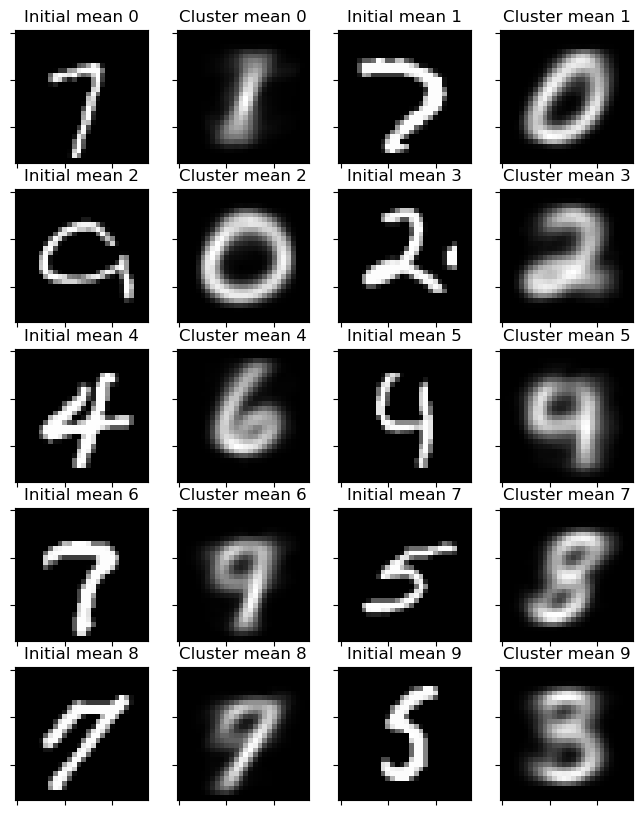

In [25]:
# Display the cluster means as images
ax, arr = plt.subplots(5,4, figsize=(8, 10))
for i in range(5):
    arr[int(i)][0].imshow(train_data[selection2[2*i]].reshape((28,28)), cmap='gray')
    arr[int(i)][0].set_yticklabels([])
    arr[int(i)][0].set_xticklabels([])
    arr[int(i)][0].set_title(f'Initial mean {2*i}')
    arr[int(i)][1].imshow(cluster_means[2*i].reshape((28,28)), cmap='gray')
    arr[int(i)][1].set_yticklabels([])
    arr[int(i)][1].set_xticklabels([])
    arr[int(i)][1].set_title(f'Cluster mean {2*i}')
    arr[int(i)][2].imshow(train_data[selection2[2*i+1]].reshape((28,28)), cmap='gray')
    arr[int(i)][2].set_yticklabels([])
    arr[int(i)][2].set_xticklabels([])
    arr[int(i)][2].set_title(f'Initial mean {2*i+1}')
    arr[int(i)][3].imshow(cluster_means[2*i+1, :].reshape((28,28)), cmap='gray')
    arr[int(i)][3].set_yticklabels([])
    arr[int(i)][3].set_xticklabels([])
    arr[int(i)][3].set_title(f'Cluster mean {2*i+1}')

From the initial means and final cluster means shown above, I can see that the initializations don't really have much of an impact on the cluster means because I can see that cluster mean 1 and 5 popped up against, even with the different random initializations. This tells me that these are stable points where the algorithm will definitely converge if near the vicinity. Hence, the algorithm is not sensitive to its initializations.